In [1]:
import parSimClass_Yuiki2SPARTA as pcy

**`parSimClass`** contains the main simulation class, **`ParticleTracing()`**, of which we will create an instance to run molecule path-tracing simulations in a given type of cell geometry. When declaring a **`ParticleTracing()`** object we wish to specify the following important parameters:

- **`flowFieldName`**: (string) the filename of the DSMC flow-field output, in the format _"directory/../DS2xyyy.DAT'_. As described in the supporting document, the file name encodes both the geometry and flow-rate of the DSMC buffer gas simulation, so the file needs to be named in this format (sorry). 


- **`NPAR`**: (integer) the number of particles to simulate.

In [6]:
ffname="/home/cal/Documents/New-Yuiki-DSMC/3Dsim/Data/flow_1.000_gap_0.003_len_0.013/data/DS2FF.500000.DAT"
geomname="/home/cal/Documents/New-Yuiki-DSMC/3Dsim/Data/flow_1.000_gap_0.003_len_0.013/data/cell.510000.surfs"
simObject = pcy.ParticleTracing_Yuiki(flowFieldName=ffname, NPAR=5000,INIT_COND=12,CORRECTION=1, geometryName=geomname, flowrate=1)

Loading grids ... 
Interpolating ... Flow field loaded


There are various other, less important attributes in a **`ParticleTracing()`** object that we could specify.

- **`CROSS_MULT`**: THIS IS NOT USED ANYMORE IN THIS CODE. The reference value of the cross section is set at $\sigma_{ref}=\sigma_{YbF-He}$, i.e. the YbF-helium cross section at 20 K.


- **`LITE_MODE`**: (bool) this flag defaults to `True`, whereby the simulation will not record the molecule's position in the output file UNTIL the molecule is sufficiently close to the cell aperture. In other words, if this flag is set to `False` the molecule position will be recorded at _every_ time-step, resulting in a much larger output file. 


- **`INIT_COND`**: (int) this parameter encodes the type of (pre-defined) initial conditions we would like to set for our molecules. The initial conditions might encode e.g. the region in the cell where the molecules are to start out, and the initial velocity distribution. These are hard-coded in the `ParticleTracing.initial_species_position()` and `ParticleTracing.initial_species_velocity()` methods. 


- **`CORRECTION`**: (int) this parameter specifies the kind of distribution we should use when generating inter-particle collision velocities. Currently defaults to `0`, indicating that an unbiased, "uncorrected" Maxwell-Boltzmann thermal distribution is used (this is the simplest/fastest distribution to draw from). If instead `CORRECTION=1` then the velocity distribution PDF has an "extra" factor of $v$ to account for the speed-dependence of the collision probability (see the reference document).  This dependence is hard-coded in `ParticleTracing.get_ambient_velocity()`.

For now we are using the default values for these "optional" parameters, and have only specified the flow field filename, `'flows/F_Cell/DS2f005.DAT'`, and the number of particles to simulate `NPAR=50` (this is just for example, we would typically want to simulate >1000 molecules).

We have already declared our instance of the particle simulation class, `simObject`. We can now proceed to run a parallelized simulation for all (10) particles using the `ParticleTracing.parallel_main()` method. This function takes a single parameter `outfile`, which specifies an output file to write our results to.



In [7]:
outfile='Data/SPARTATest/1.dat'

simObject.parallel_main(outfile); #Runs parallelized simulations in simObject

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

/home/cal/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  27 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done  30 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  32 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Paralle

The output file will contain a list of 7-column rows. The seven columns correspond to three positions $x,y,z$, three velocities $v_x,v_y,v_z$, and a time $t$. Each row specifies a single particle, at a single time step. The file is organized into single-particle blocks, separated by rows of `0 0 0 0 0 0 0`. Each block starts and ends with the initial and final data for each particle, respectively.

To get a basic analysis of the particle data, we can use the **`fluidSim3D`** python program.

In [4]:
import fluidSim3D_Yuiki2SPARTA as fs

Running the `analyzeTrajData()` method on our freshly made output file will give us basic statistics and plots about the final molecule distributions. However, the script relies on knowledge of the cell geometry (e.g. cell dimensions, aperture shape) to properly analyze the data, so we encode the geometry in the file name according to our usual format.

Now we have our output file in the folder `FCellTesting`, with the filename `f005.dat` indicating that the simulation used cell geometry `f` with a flow rate of `5 SCCM`. 

The aperture is at z = 0.08316 m.
Analysis of data for z = 0.11316 m, equal to 0.03 m past the aperture:
dome_rad is equal to 30.0
Number of particles: 5000


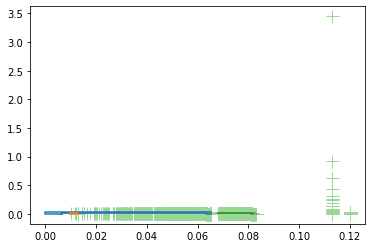

numArrived:46, pdata: (46, 9)
Number arrived = 46, size of xs = (46,)
Median radius 23.533 mm, median theta 94.523 deg
46 were useful (0.92%)


<Figure size 432x288 with 0 Axes>

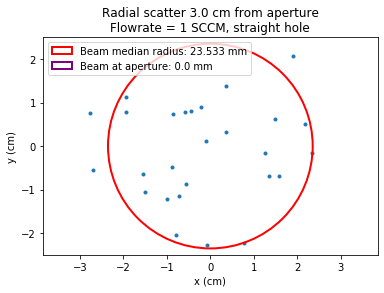

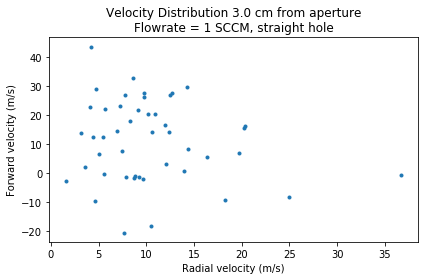

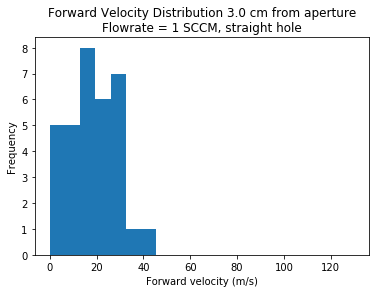

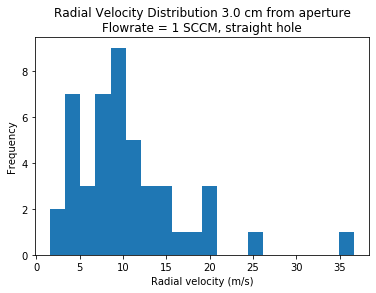

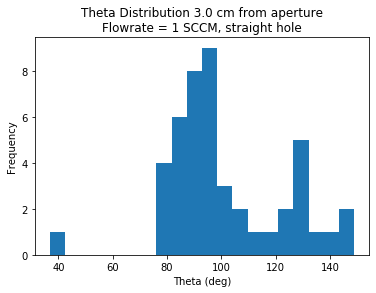

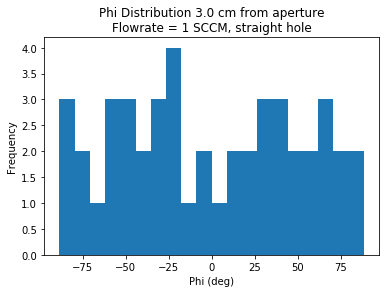

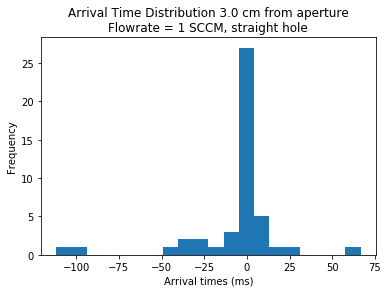


Analysis of data for z = 0.11316 m, equal to 0.03 m past the aperture:
46/5000 (0.9%) made it to z = 0.11316 m.
Standard deviation in extraction: 0.1%.
Radial velocity 3.0 cm from aperture: 10.5 +- 6.4 m/s
Axial velocity 3.0 cm from aperture: 11.1 +- 13.9 m/s
Angular spread 3.0 cm from aperture: 86.5 deg 

Theta dist 3.0 cm from aperture: 101.3 +- 21.6 deg
Pumpout time dist 3.0 cm from aperture: -4.6 +- 26.7 ms 

Beam mean forward velocity: 11.131 m/s


<Figure size 432x288 with 0 Axes>

In [8]:
fs.analyzeTrajData(file_ext='1', folder='SPARTATest', plots=True, geom_ext='Data/SPARTATest/cell.510001.surfs', flowrate=1)

In [ ]:
fs.analyzeTrajData(file_ext='t005', folder='TCellTesting', plots=True)

In [ ]:
fs.analyzeTrajData(file_ext='t010', folder='TCellTesting', plots=True)

In [ ]:
fs.analyzeTrajData(file_ext='y010', folder='YCellTesting', plots=True)

In [ ]:
fs.analyzeTrajData(file_ext='y005', folder='YCellTesting', plots=True)

In [ ]:
fs.analyzeTrajData(file_ext='y905', folder='YCellTesting', plots=True)

If we now wanted to compare these results against simulations using a different cell geometry, e.g. hourglass-aperture geometry **`h`**, but with the same parameters, we can change the geometry of `simObject` using the method `ParticleTracing.set_flow_type()`, which takes as input the filename `ff` of the DSMC flow field we want to load.

In [ ]:
simObject.set_flow_type('flows/H_Cell/DS2h005.DAT')

This will set `simObj._flowrate=5` and `simObj._geometry='h'`. Here, the helium gas flow field is uploaded from `flows/H_Cell/DS2h005.DAT`, the ouput file of a DSMC simulation that used 5 SCCM flowrate in geometry "H" -- the hourglass aperture shown below. With the new flow data loaded, we can again run a parallelized simulation of `NPAR=50` molecules.

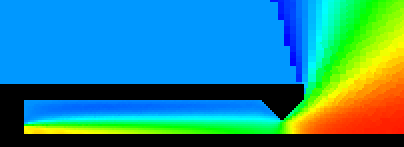

In [ ]:
#Run simulation, store results in outfile2
outfile2 = 'Data/outputTest_H.dat'
simObject.parallel_main(outfile2); 

# Now copy/rename to a new file which encodes geometry/flowrate in the filename, 
# 'Data/outputTest_H.dat'-->'Data/HCellTesting/h005.dat'

# e.g.
# mkdir Data/HCellTesting
# cp Data/outputTest_H.dat Data/HCellTesting/h005.dat

We can again look at some statistics for the molecule distribution:

In [ ]:
fs.analyzeTrajData(file_ext='h005', folder='HCellTesting', plots=True) 

Suppose we want to compare the results of a simulation using the corrected probability distribution (which accounts for the bias towards higher relative speeds due to the velocity-dependence of the collision cross section) against results which use the naive Maxwell-Boltzmann distribution.

In [ ]:
simObject.set_sim_params(CORRECTION=True) ##Sets the CORRECTION flag to use the proper PDF

outfile_c = 'Data/CorrectedTest_Yuiki.dat'

simObject.parallel_main(outfile_c)

In [ ]:
fs.analyzeTrajData(file_ext='f005', folder='FCellTesting', plots=True)

In [ ]:
import cProfile
if __name__ == '__main__':
    cProfile.run('main()', filename='main.prof')